In [ ]:
pip uninstall project

In [1]:
pip install project --upgrade

Requirement already up-to-date: project in c:\anac\lib\site-packages (20)
Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from project import handling_missing_values
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from project import preprocessed_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from project import classification_target
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import SelectFromModel

In [43]:
ames=pd.read_csv("C:/Users/Cemil Turhan/Downloads/train.csv")

In [12]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
ames.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

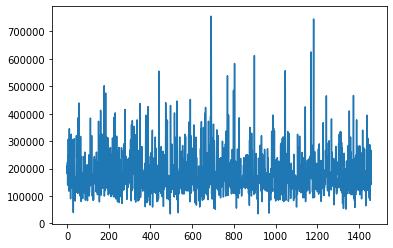

In [15]:
plt.plot(ames.SalePrice)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

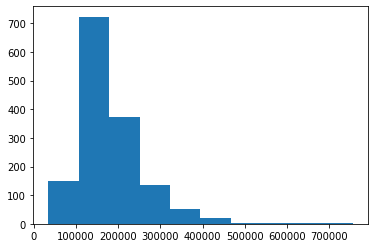

In [16]:
plt.hist(ames.SalePrice)

In [44]:
handling_missing_values(ames)
target = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in ames.SalePrice]

In [45]:
new=preprocessed_data(ames)

In [46]:
print(new)

[[   0    0    0 ...    0    0    2]
 [   1    0    0 ...    0    0    5]
 [   0    0    0 ...    0    0    9]
 ...
 [   0    0    0 ...    0 2500    5]
 [   1    0    0 ...    0    0    4]
 [   1    0    0 ...    0    0    6]]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(new, target)

In [48]:
rf = RandomForestClassifier()

In [49]:
 scaler = StandardScaler()

In [50]:
scaled_data=scaler.fit_transform(X_train)

In [36]:
print(scaled_data)

[[-0.76204663 -0.222801   -0.05243225 ... -0.0687154  -0.08771809
  -1.59902959]
 [ 1.31225566 -0.222801   -0.05243225 ... -0.0687154  -0.08771809
  -0.48931776]
 [-0.76204663 -0.222801   -0.05243225 ... -0.0687154  -0.08771809
   0.99029801]
 ...
 [-0.76204663 -0.222801   -0.05243225 ... -0.0687154   4.95136791
  -0.48931776]
 [ 1.31225566 -0.222801   -0.05243225 ... -0.0687154  -0.08771809
  -0.8592217 ]
 [ 1.31225566 -0.222801   -0.05243225 ... -0.0687154  -0.08771809
  -0.11941382]]


In [58]:
scaled_data.shape

(1094, 259)

### VarianceThreshold Feature Selection
Eliminates features having low variance below threshold. 

In [54]:
thresholder = VarianceThreshold(threshold=.5)

In [55]:
data_var_th=thresholder.fit_transform(scaled_data)

In [56]:
print(data_var_th)

[[-0.76068626 -0.2233921  -0.06057825 ... -0.07941735 -0.08010964
   0.26106108]
 [-0.76068626 -0.2233921  -0.06057825 ... -0.07941735 -0.08010964
  -0.48463296]
 [-0.76068626 -0.2233921  -0.06057825 ... -0.07941735 -0.08010964
  -0.11178594]
 ...
 [-0.76068626 -0.2233921  -0.06057825 ... -0.07941735 -0.08010964
   2.12529618]
 [-0.76068626 -0.2233921  -0.06057825 ... -0.07941735 -0.08010964
  -0.48463296]
 [ 1.31460243 -0.2233921  -0.06057825 ... -0.07941735 -0.08010964
  -1.23032701]]


In [57]:
 data_var_th.shape 

(1094, 252)

In [59]:
rf.fit(data_var_th, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rf.score(data_var_th, y_train)

1.0

In [61]:
rf.fit(scaled_data, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
rf.score(scaled_data, y_train)

1.0

In [64]:
rf.score(X_train, y_train)

0.30438756855575866

In [65]:
rf.score(X_test, y_test)

0.2602739726027397

### SelectKBest Feature Selection
Select features according to the k highest scores using some metrics. Here I used F score.

In [82]:
select_best=SelectKBest(f_classif, k=50)
select_best_2=SelectKBest(f_classif, k=30)

In [75]:
data_best=select_best.fit_transform(X_train, y_train)

C:\anac\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 69  70  71  96 105 120 207] are constant.
  UserWarning)
C:\anac\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [78]:
data_best

array([[  0,   0,   1, ..., 888,   0,  25],
       [  0,   0,   0, ..., 420, 140,   0],
       [  0,   0,   0, ..., 440,   0,  32],
       ...,
       [  0,   1,   1, ..., 497, 294, 116],
       [  0,   0,   1, ..., 264,  80,   0],
       [  0,   0,   1, ..., 484,   0,   0]], dtype=int64)

In [80]:
rf.fit(data_best, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
rf.score(data_best, y_train)

1.0

In [83]:
data_best_2=select_best_2.fit_transform(X_train, y_train)

C:\anac\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 69  70  71  96 105 120 207] are constant.
  UserWarning)
C:\anac\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [85]:
rf.fit(data_best_2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
rf.score(data_best_2, y_train)

1.0

### Select from Model Using Random Forest
Selects features based on weights

In [88]:
selector_model = SelectFromModel(estimator=RandomForestClassifier()).fit(X_train, y_train)

In [89]:
selector_model.get_support() #to see which features

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [93]:
new_X_sfm=selector_model.transform(X_train)

In [95]:
rf.fit(new_X_sfm, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
rf.score(new_X_sfm, y_train)

1.0